<a href="https://colab.research.google.com/github/richsharples/MIT-DS/blob/main/Reference_Notebook_Milestone_2_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Milestone 2**

In [ ]:
# It is recommended to upgrade the statsmodels library. 
# Uncomment the below code to upgrade statsmodels
!pip install statsmodels==0.12.1


# Version check 
import statsmodels
statsmodels.__version__

     |████████████████████████████████| 9.5 MB 6.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


'0.12.1'

### **Natural gas based CO2 emission forecasting**

In [ ]:
#Import basic libraries
import pandas as pd
import warnings
import itertools
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

For developing the time series model and forecasting, you are expected to use the natural gas CO2 emission from the electrical power generation. We need to slice this data:

In [ ]:
# Read the data

from google.colab import drive
drive.mount('/content/drive')

dfname = '/content/drive/MyDrive/MIT-DataServices/Notebooks/Capstone/MER_T12_06.xlsx'

dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')

#We're only interested in the first 3 columns - YYYYMM, MSN, Value
df = pd.read_excel(dfname, 
                parse_dates=['YYYYMM'],
                index_col='YYYYMM', 
                date_parser=dateparse)

df.head() 

Mounted at /content/drive


,MSN,Value,Description
YYYYMM,,,
1973-01-01,CLEIEUS,72.076,Coal Electric Power Sector CO2 Emissions
1973-02-01,CLEIEUS,64.442,Coal Electric Power Sector CO2 Emissions
1973-03-01,CLEIEUS,64.084,Coal Electric Power Sector CO2 Emissions
1973-04-01,CLEIEUS,60.842,Coal Electric Power Sector CO2 Emissions
1973-05-01,CLEIEUS,61.798,Coal Electric Power Sector CO2 Emissions


In [ ]:
###Slice the data to get the monthly total CO2 emissions of Natural Gas Electric Power Sector
 
Emissions = df.iloc[:,1:]   # Monthly total emissions (mte)
Emissions= Emissions.groupby(['Description', pd.Grouper(freq='M')])['Value'].sum().unstack(level = 0)
mte = Emissions['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions (mte)

#convert the emision value into numeric value
 
mte = pd.to_numeric(mte,errors = 'coerce')

mte

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
               ...  
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Name: Natural Gas Electric Power Sector CO2 Emissions, Length: 523, dtype: float64

In [ ]:
 #Check 1st few rows of data

print (mte.count())
print (mte.head())
print (mte.tail())

523
YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64


###**Split the dataset**

In [ ]:
# Split the data into train and test
# Train : 70% of 523 = 366
# Test = 157

mte_train = mte.iloc[0:366]
mte_test = mte.iloc[366:523]

print ("Train")
print (mte_train.count())
print ( mte_train.head())
print ( mte_train.tail())

print ("Test")
print (mte_test.count())
print ( mte_test.head())
print ( mte_test.tail())

Train
366
YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
YYYYMM
2003-02-28    18.157
2003-03-31    19.593
2003-04-30    19.097
2003-05-31    21.338
2003-06-30    23.597
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
Test
157
YYYYMM
2003-07-31    34.140
2003-08-31    37.020
2003-09-30    25.382
2003-10-31    22.150
2003-11-30    18.858
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64
YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64


###**Test the Stationarity**

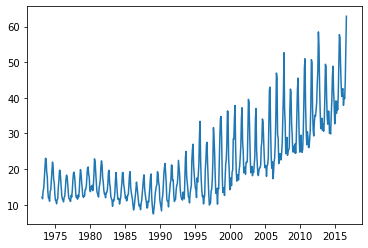

In [ ]:
#Import the required package

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

plt.plot(mte)


###**Test the stationarity through Visualization**

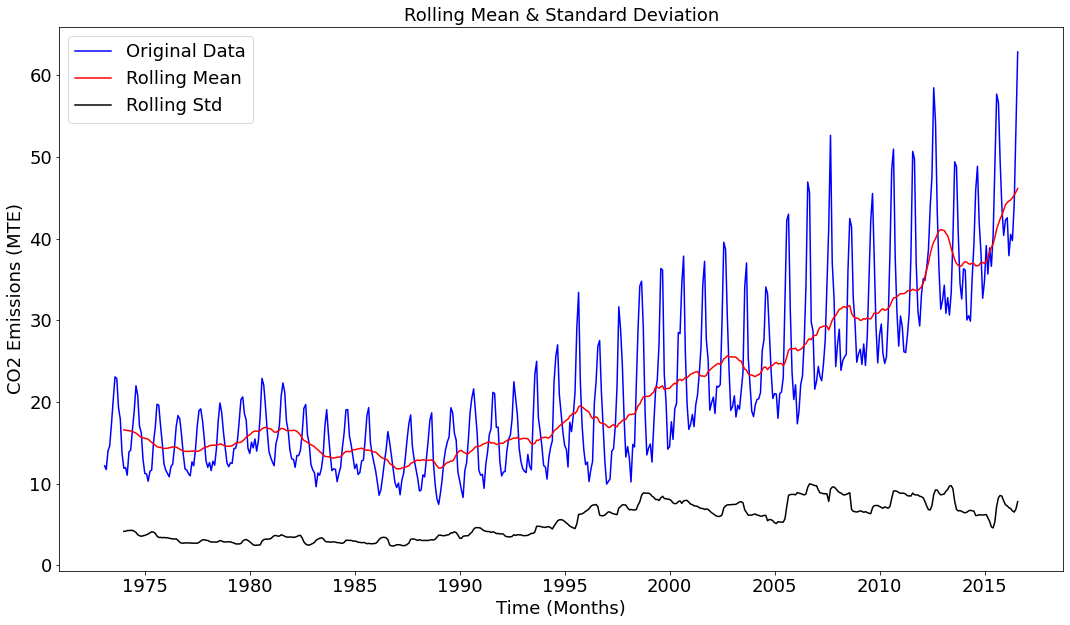

In [ ]:
from IPython.core.pylabtools import figsize

# Function to visualize the rolling mean and standard deviation

def TestStationaryPlot(ts, win):

    FSZ = 18
    rol_mean = ts.rolling(window = win, center = False).mean()
    rol_std = ts.rolling(window = win, center = False).std()
    
    plt.figure(figsize=(18,10))

    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = FSZ)
    plt.yticks(fontsize = FSZ)
    
    plt.xlabel('Time (Months)', fontsize = FSZ)
    plt.ylabel('CO2 Emissions (MTE)', fontsize = FSZ)
    plt.legend(loc='best', fontsize = FSZ)
    plt.title('Rolling Mean & Standard Deviation', fontsize = FSZ)
    plt.show(block= True)


# Calculate the rolling mean and standard deviation for a window of 12 observations

TestStationaryPlot(mte,12)


#### **Observations and Insights: **

There is an obvious upward trend in the Rolling Mean and the Standard Deviation varies slightly over time. The series is not stationary.


### **Test the stationarity using the Augmented Dickey-Fuller Test**


Use the **Augmented Dickey-Fuller (ADF) Test** to verify if the series is stationary or not. The null and alternate hypotheses for the ADF Test are defined as:

**- Null hypothesis:** The Time Series is non-stationary


**- Alternative hypothesis:** The Time Series is stationary

In [ ]:
#Define a function to use adfuller test

#Importing adfuller using statsmodels
from statsmodels.tsa.stattools import adfuller

def TestStationarityADF(df_train):
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df_train)
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)



TestStationarityADF(mte)

Dickey-Fuller Test: 
Test Statistic            1.831215
p-value                   0.998409
Lags Used                19.000000
No. of Observations     503.000000
Critical Value (1%)      -3.443418
Critical Value (5%)      -2.867303
Critical Value (10%)     -2.569840
dtype: float64


- **Observations and Insights**

From the above test, we can see that the p-value = 0.99 i.e. > 0.05 (For 95% confidence intervals) therefore, we fail to reject the null hypothesis.
Hence, we can confirm that the series is non-stationary.

###**Transformation of the dataset into a stationary one**

**We can use some of the following methods to convert a non-stationary series into a stationary one:**


1. Log Transformation
2. Differencing the series (lagged series)

We take the average of ‘k’ consecutive values depending on the frequency of time series (in this capstone 12 months). 

Here, we will take the average over the past 1 year.

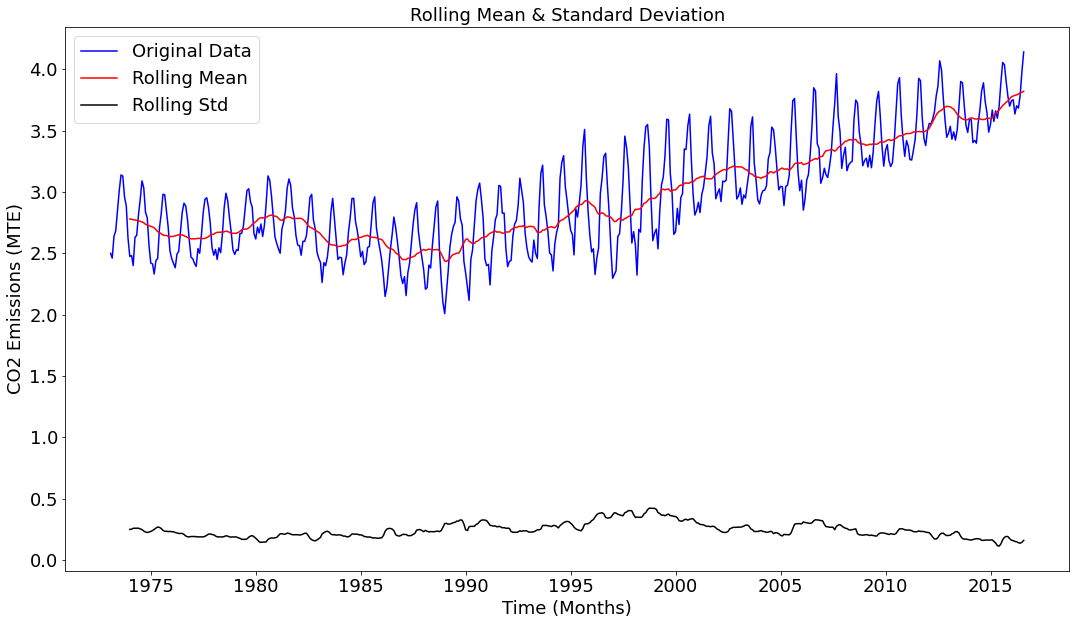

In [ ]:
# Visualize the rolling mean and standard deviation after using log transformation

mte_log = np.log(mte)

TestStationaryPlot(mte_log,12)


**Observations and Insights: **

After the log transformation, there is still an obvious upward trend in the Rolling Mean The Standard Deviation has improved but is not constant. The series is still not stationary.

**Visualize the rolling mean and rolling standard deviation of the shifted series (df_shift) and check the stationarity by calling the adfuller() function. Also, write your observations on the same.**

####**Think about it:**

- Do you need to remove the null values that we get after applying differencing method?

Yes - otherwise Dicky Full Test blows up

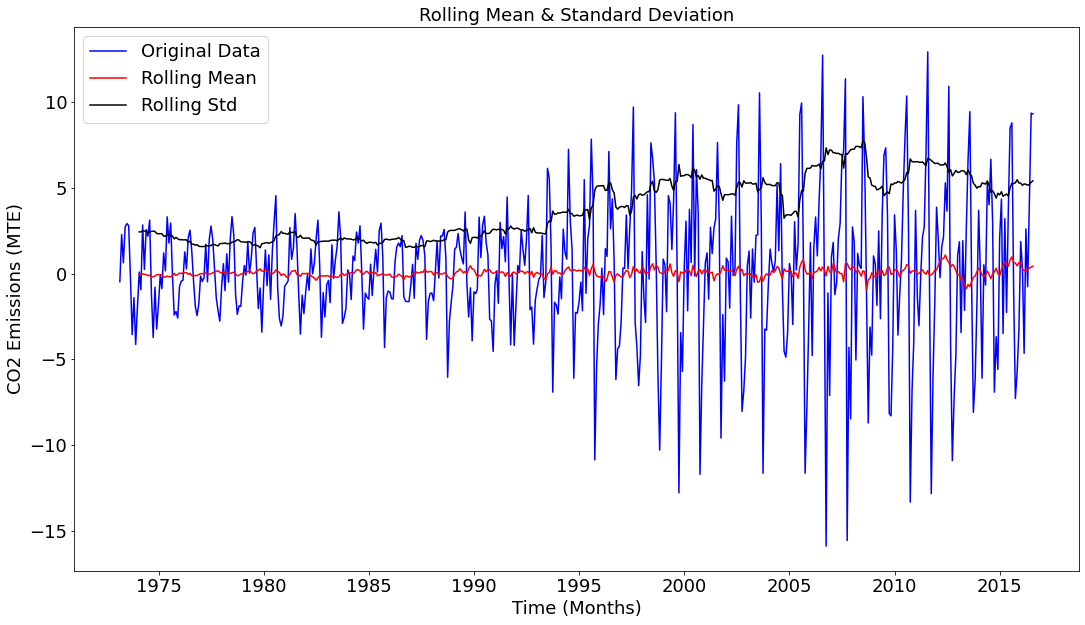

In [ ]:
##Code here

mte_diff = mte - mte.shift(1)

mte_diff.dropna(inplace=True)

TestStationaryPlot (mte_diff,12)

**Observations and Insights: **

Rolling mean is constant 

In [ ]:
TestStationarityADF(mte_diff)

Dickey-Fuller Test: 
Test Statistic           -5.435116
p-value                   0.000003
Lags Used                18.000000
No. of Observations     503.000000
Critical Value (1%)      -3.443418
Critical Value (5%)      -2.867303
Critical Value (10%)     -2.569840
dtype: float64


**Observations and Insights: **

p_value is less than 0.5 so the series is stationary

### **Elimination of trend and seasonality: Decomposition**

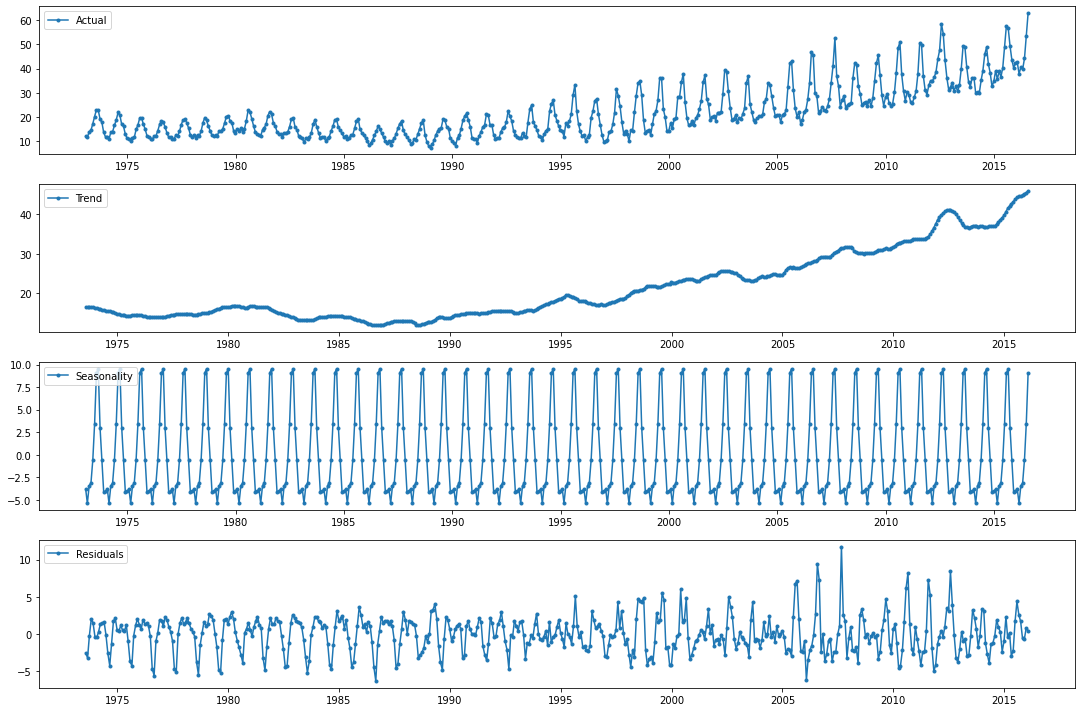

In [ ]:
#Importing the seasonal_decompose function to decompose the time series

from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(mte)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(mte, label='Actual', marker='.')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', marker='.')
plt.legend(loc='upper left')
plt.subplot(413)

plt.plot(seasonal, label='Seasonality', marker='.')
plt.legend(loc='upper left')
plt.subplot(414)

plt.plot(residual, label='Residuals', marker='.')
plt.legend(loc='upper left')
plt.tight_layout()

**Observations and Insights: **

We can see that there are significant trend, seasonality and residuals components in the series


**Plot the auto-correlation function and partial auto-correlation function to get p and q values for AR, MA, ARMA, and ARIMA models**

### **Find optimal parameters (P, Q) and build the AR, MA, ARMA & ARIMA models**

**Plot the ACF and PACF charts and find the optimal parameters**

<Figure size 1152x576 with 0 Axes>

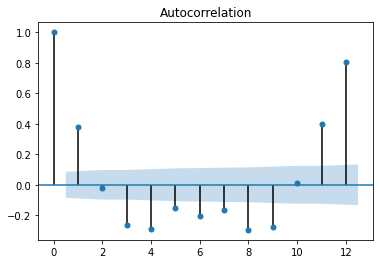

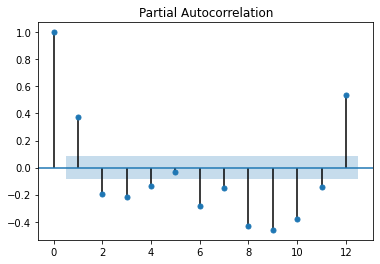

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

nlags = 12

plt.figure(figsize = (16,8))
plot_acf(mte_diff, lags = nlags) 
plt.show() 

plot_pacf(mte_diff, lags = nlags) 
plt.show()

**Observations and Insights: **

From the above PACF plot we can see that the highest lag at which the plot extends beyond the statistically significant boundary is lag 1.
This indicates that an AR Model of lag 1 (p=1) should be sufficient to fit the data.
Similarly, from the ACF plot, we can infer that q=1.

###**AR Model**

Order p is the lag value after which the PACF plot crosses the upper confidence interval for the first time. These p lags will act as our features while forecasting the AR time series.

Fit and predict the shifted series with the AR Model and calculate the RMSE. Also, visualize the time series and write your observations.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


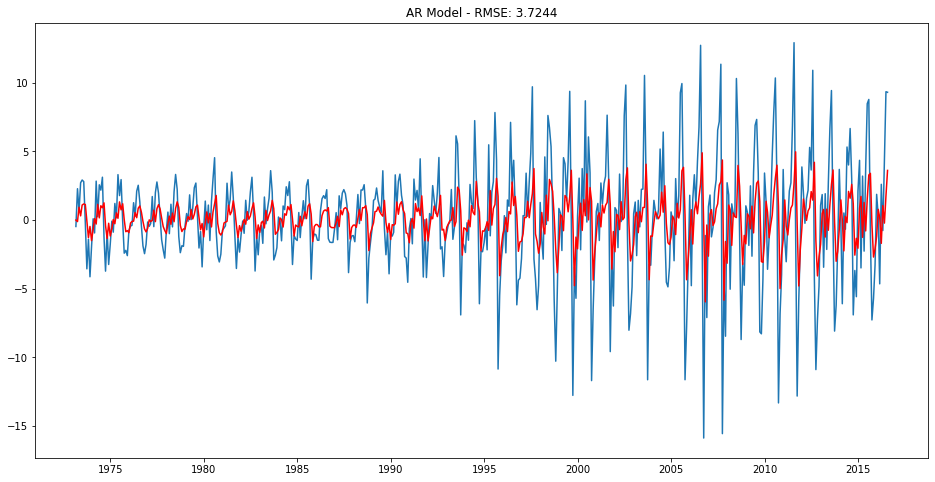

AIC=2.64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
#Importing AutoReg function to apply AR model
from statsmodels.tsa.ar_model import AutoReg

#To calculate the MSE or RMSE
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(16,8))
model_AR = AutoReg(mte_diff,lags=1) #Use number of lags as 1 and apply AutoReg function on df_shift series
results_AR = model_AR.fit() #fit the model
plt.plot(mte_diff)
predict = results_AR.predict() #predict the series 
predict = predict.fillna(0) #Converting NaN values to 0
plt.plot(predict, color='red')
plt.title('AR Model - RMSE: %.4f'% mean_squared_error(predict,mte_diff, squared=False))  #Calculating rmse
plt.show()

print(f"AIC=%.2f"%results_AR.aic)


**Observations & Insights: _____**

###**MA Model**

####**Think about it:**

- Do we really have to find AR & I value other than 0 to forecast on the MA based model?

Order q of the MA process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.

Fit and predict the shifted series with the MA Model and calculate the RMSE. Also, visualize the time series and write your observations.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


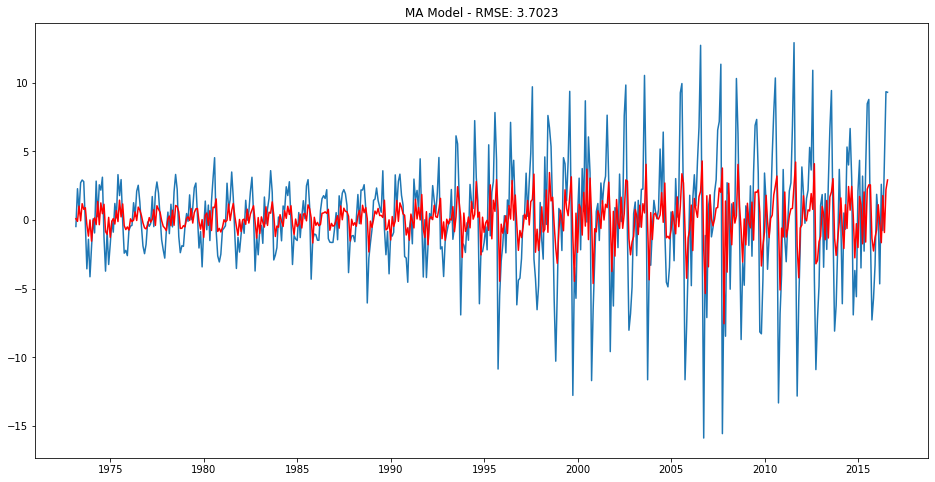

AIC=2854.07


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16,8))
model_MA = ARIMA (mte_diff, order=(0, 0, 1))  #Using p=0, d=0, q=1 and apply ARIMA function on df_shift series
results_MA = model_MA.fit() #fit the model
plt.plot(mte_diff)
plt.plot(results_MA.predict(), color='red')
plt.title('MA Model - RMSE: %.4f'% mean_squared_error(results_MA.fittedvalues,mte_diff, squared=False))
plt.show()

print(f"AIC=%.2f"%results_MA.aic)


**Observations & Insights: _____**

###**ARMA MODEL**

**We will be using the above AR lag(P) & MA lag(Q) as a paramter** and d=0 in ARIMA so that it will work as an ARMA model.

Fit and predict the shifted series with the ARMA Model and calculate the RMSE. Also, visualize the time series and write your observations.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


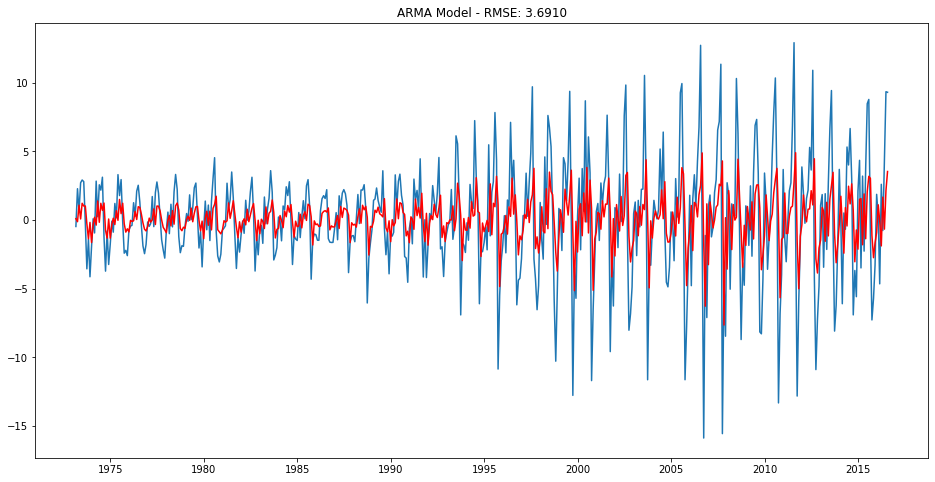

AIC=2852.91


In [ ]:
plt.figure(figsize=(16,8))
model_ARMA = ARIMA (mte_diff, order=(1, 0, 1)) #Using p=1, d=0, q=1 and apply ARIMA function on mte_diff series
results_ARMA = model_ARMA.fit() #fit the model
plt.plot(mte_diff)
plt.plot(results_ARMA.predict(), color='red')
plt.title('ARMA Model - RMSE: %.4f'% mean_squared_error(results_ARMA.fittedvalues,mte_diff, squared=False))
plt.show()
print(f"AIC=%.2f"%results_ARMA.aic)


**Observations & Insights: _____**

**Check the AIC value of the model**

In [ ]:
print(f"AIC=%.2f"%results_ARMA.aic)


AIC=2852.91


###**ARIMA MODEL**

**Fit and predict the shifted series with the ARIMA Model and calculate the RMSE. Also, visualize the time series and write your observations.**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


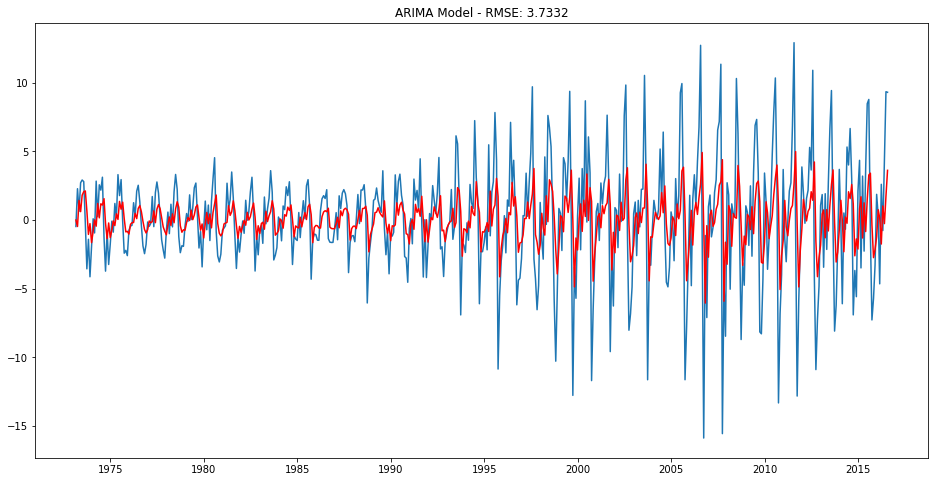

AIC=2861.14


In [ ]:
model_ARIMA = ARIMA(mte_diff, order=(1, 1, 1)) #Using p=1, d=1, q=1 and apply ARIMA function on mte_diff series
results_ARIMA = model_ARIMA.fit() #fit the model

plt.figure(figsize=(16,8))

plt.plot(mte_diff)
plt.plot(results_ARIMA.predict(), color='red')

plt.title('ARIMA Model - RMSE: %.4f'% mean_squared_error(results_ARIMA.fittedvalues,mte_diff, squared=False))
plt.show()

print(f"AIC=%.2f"%results_ARIMA.aic)


**Check the AIC value of the model**

In [ ]:
# Printing the fitted values from arima

###**Inverse Transformation**

**Use the correct inverse transformation depending on the model chosen to get back the original values.**



**Apply an inverse transformation on the predictions of the chosen model**

In [ ]:
#Add the code blocks based on the requirements

**Plot the original vs predicted series**

In [ ]:
#Code here

**Observations & Insights: _____**

###**Forecast the values for next 24 months and compare it with test data**

In [ ]:
#Add the code blocks based on the requirements

###**Check the RMSE on the original train and test data and write your conclusion from the above analysis.**

####**Think about it:**
- Can we use other than RMSE measurement to check the performance of the model?

####**Think about it:**

 Can we use other forecasting methods such as SARIMA to improve our model performance?

- [A Gentle Introduction to SARIMA for Time Series Forecasting in Python](https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/)
- [Forecasting with Seasonal ARIMA in Python](https://www.datasciencecentral.com/profiles/blogs/tutorial-forecasting-with-seasonal-arima)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


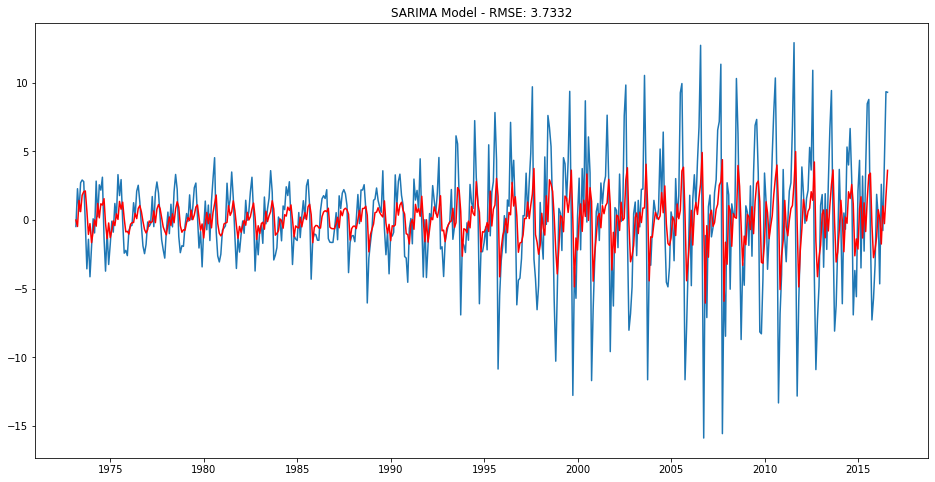

AIC=2861.14


In [ ]:
import statsmodels.api as sm

model_SARIMA=sm.tsa.statespace.SARIMAX(
      mte_diff,order=(1, 1, 1),
      seasonal_order=(1,1,1,12))
    
results_SARIMA = model_ARIMA.fit() #fit the model

plt.figure(figsize=(16,8))

plt.plot(mte_diff)
plt.plot(results_SARIMA.predict(), color='red')

plt.title('SARIMA Model - RMSE: %.4f'% mean_squared_error(results_SARIMA.fittedvalues,mte_diff, squared=False))
plt.show()

print(f"AIC=%.2f"%results_SARIMA.aic)


## **Proposed Approach**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?